In [2]:
#IMPORTS

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [3]:
#DATA

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


/var/folders/td/jy59jdfd1vx8qxl4tjdw2btw0000gn/T/ipykernel_55490/3141775617.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[9])])


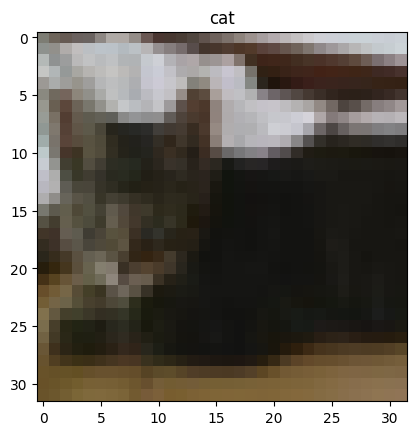

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(x_train[9])
plt.title(class_names[int(y_train[9])])
plt.show()

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 32, 32) (10000, 32, 32)


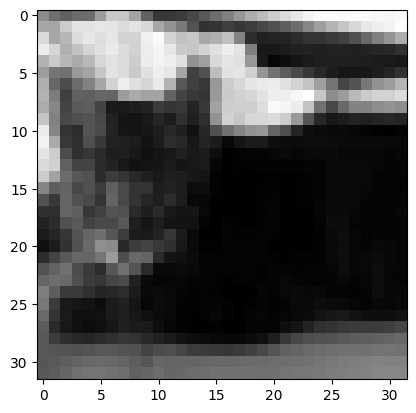

In [118]:
#Normalisation des couleurs

print(x_train.shape, x_test.shape)

x_train = 0.2989 * x_train[:][:,:,:,0] + 0.5870 * x_train[:][:,:,:,1] + 0.1140 * x_train[:][:,:,:,2]
x_test = 0.2989 * x_test[:][:,:,:,0] + 0.5870 * x_test[:][:,:,:,1] + 0.1140 * x_test[:][:,:,:,2]

print(x_train.shape, x_test.shape)


# Convertir l'image en niveaux de gris
#image_gray = 0.2989 * x_train[9][:,:,0] + 0.5870 * x_train[9][:,:,1] + 0.1140 * x_train[9][:,:,2]

# Afficher l'image en niveaux de gris
plt.imshow(x_train[9], cmap='gray')
plt.show()

In [5]:
#Normalisation des Pixels
print(x_train.min(), x_train.max())
x_train = x_train / 255.0   # Normalisation des pixels entre 0 et 1
x_test = x_test / 255.0    # Normalisation des pixels entre 0 et 1
print(x_train.min(), x_train.max())

0 255
0.0 1.0


In [91]:
# CREATION DU MODELE

hidden1 = 3000
hidden2 = 1000

model = keras.Sequential([
    keras.layers.Input((32, 32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.1474 - loss: 4.9087 - val_accuracy: 0.2915 - val_loss: 1.9602
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.3196 - loss: 1.8981 - val_accuracy: 0.3442 - val_loss: 1.8095
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.3734 - loss: 1.7476 - val_accuracy: 0.4041 - val_loss: 1.6860
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4049 - loss: 1.6653 - val_accuracy: 0.4259 - val_loss: 1.6244
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.4255 - loss: 1.6039 - val_accuracy: 0.4338 - val_loss: 1.6019


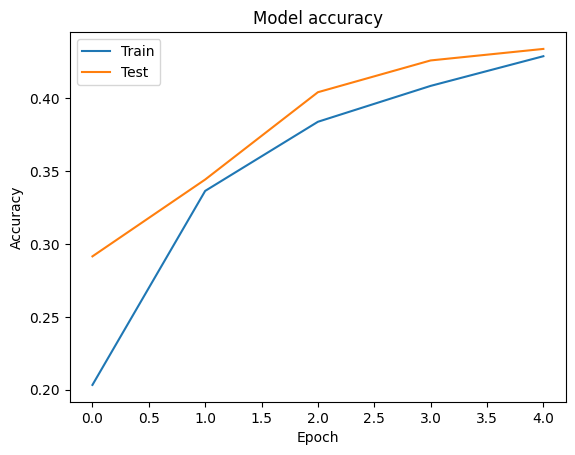

In [92]:
#Entrainement du modele

batch_size = 700
epochs = 5


history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [93]:
# Evaluer le modèle

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6019049882888794
Test accuracy: 0.43380001187324524


# Erreur

Il nous faut maintenant adapter le model pour comme un CNN avec des filtres

In [20]:
# CREATION DU NOUVEAU MODELE

hidden1 = 128

model_CNN = keras.Sequential([
    # Input Layer
    keras.layers.Input(shape=(32,32,3)),
    #CNN
    keras.layers.Conv2D(activation='relu', filters=32, kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(activation='relu', filters=32, kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(activation='relu', filters=32, kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),
    #DNN
    keras.layers.Flatten(),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3213 - loss: 1.8215 - val_accuracy: 0.5058 - val_loss: 1.3616
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5189 - loss: 1.3265 - val_accuracy: 0.5046 - val_loss: 1.3829
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5889 - loss: 1.1630 - val_accuracy: 0.5688 - val_loss: 1.2052
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6254 - loss: 1.0658 - val_accuracy: 0.6223 - val_loss: 1.0680
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6498 - loss: 0.9856 - val_accuracy: 0.6564 - val_loss: 0.9854
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6723 - loss: 0.9333 - val_accuracy: 0.6601 - val_loss: 0.9685
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.8848 - val_accuracy: 0.6713 - val_loss: 0.9409
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6963 - loss: 0

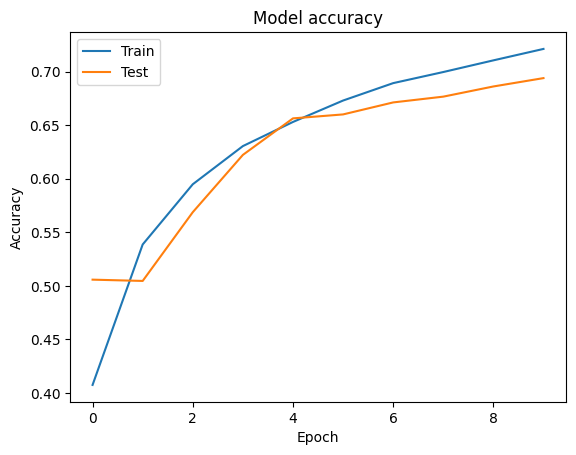

In [21]:
#Entrainement du modele

batch_size = 512
epochs = 10


history = model_CNN.fit(x_train,y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
L'image était :  truck
L'image prédit était :  truck


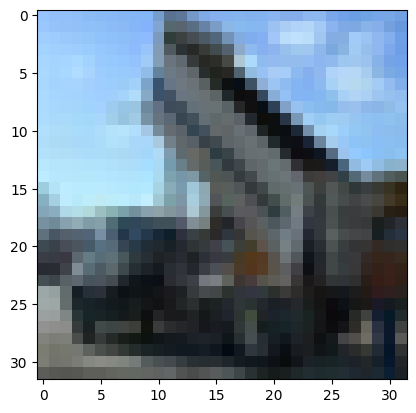

In [22]:
# Test d'un model de base sur MNIST

image = x_test[50]
prediction = model_CNN.predict(image.reshape(1,32,32,3))

print("L'image était : ", class_names[int(y_test[50][0])])
print("L'image prédit était : ", class_names[np.argmax(prediction)])

plt.imshow(image)